# Let's examin our dataset in detail and get some descriptive statistics and graphs going on here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [51]:
master = pd.read_csv('master.csv')
master.head()

,patent_number,grant_year,app_year,num_inventors,us_inventor,cite_foreign_patent,is_missing,num_design_cited,num_utility_cited,non-pat_refs,num_figures,num_assignees
0,D257752,1981,1980,1,1.0,0.0,1,1,2,1.0,6.0,1
1,D257924,1981,1980,1,1.0,0.0,1,1,2,1.0,6.0,1
2,D258382,1981,1980,2,1.0,0.0,1,2,1,0.0,5.0,1
3,D258383,1981,1980,2,1.0,0.0,1,2,1,0.0,5.0,1
4,D258571,1981,1980,1,1.0,0.0,1,1,1,0.0,2.0,1


Descriptive statisitcs
Note: Grant year and app year are not applicable columns for this

In [52]:
#grant year and app year are not applicat
master.describe()

,grant_year,app_year,num_inventors,us_inventor,cite_foreign_patent,is_missing,num_design_cited,num_utility_cited,non-pat_refs,num_figures,num_assignees
count,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000,525490.000000
mean,2004.314710,2002.757445,1.779726,0.598485,0.136646,0.551676,9.162595,4.275358,1.308341,7.032210,1.007928
std,9.031546,9.326707,1.462698,0.490205,0.343473,0.497323,14.498546,13.186508,7.008215,4.448545,0.097574
min,1981.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1998.000000,1996.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,5.000000,1.000000
50%,2006.000000,2005.000000,1.000000,1.000000,0.000000,1.000000,5.000000,2.000000,0.000000,7.000000,1.000000
75%,2012.000000,2011.000000,2.000000,1.000000,0.000000,1.000000,11.000000,4.000000,1.000000,8.000000,1.000000
max,2017.000000,2015.000000,37.000000,1.000000,1.000000,1.000000,562.000000,989.000000,540.000000,576.000000,8.000000


In [74]:
master[master['us_inventor'] == 1.0].shape

(314498, 12)

# US First inventor

There are 314,498 patents with a first inventor located in the US

# missing references

There are approx: 55.167% patents affected by missing references

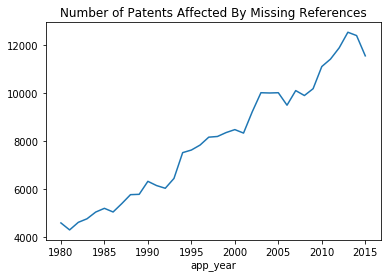

In [19]:
master[master['is_missing'] == 1].groupby('app_year')['is_missing'].count().plot(title="Number of Patents Affected By Missing References")

# Task 1- Graphs of descriptive trends over time

In [4]:
application_data = pd.read_csv('application.tsv', delimiter='\t', usecols=['patent_id', 'date'])
application_data.head()

,patent_id,date
0,D345393,1992-12-21
1,5164715,1990-04-10
2,5177974,1988-06-23
3,5379515,1994-02-16
4,5264790,1991-07-01


In [5]:
application_data['date'] = pd.to_datetime(application_data['date'], errors='coerce').apply(lambda x: x.year)
application_data = application_data[(application_data['date'] >=1980) & (application_data['date'] <=2015)]
application_data.head()

,patent_id,date
0,D345393,1992.0
1,5164715,1990.0
2,5177974,1988.0
3,5379515,1994.0
4,5264790,1991.0


In [6]:
design = application_data[application_data['patent_id'].str.contains('D\d{6}')]

In [10]:
utility = application_data[application_data['patent_id'].str.contains('\d{7}')]

Text(0,0.5,'Applications')

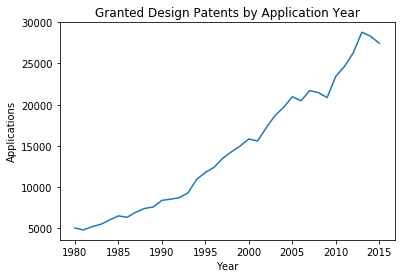

In [19]:
ax = design.groupby('date')['patent_id'].count().plot(title='Granted Design Patents by Application Year')
ax.set_xlabel('Year')
ax.set_ylabel('Applications')

Text(0,0.5,'Applications')

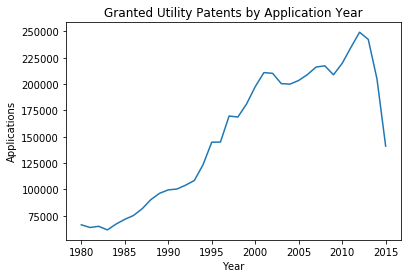

In [21]:
ax = utility.groupby('date')['patent_id'].count().plot(title ='Granted Utility Patents by Application Year')
ax.set_xlabel('Year')
ax.set_ylabel('Applications')

Text(0,0.5,'Applications')

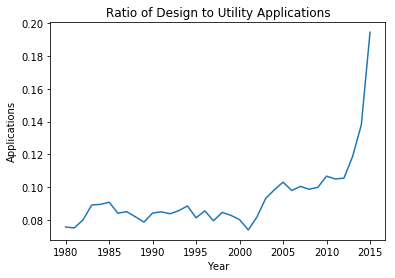

In [25]:
ax = (design.groupby('date')['patent_id'].count() / utility.groupby('date')['patent_id'].count()).plot(title='Ratio of Design to Utility Applications')
ax.set_xlabel('Year')
ax.set_ylabel('Applications')

Source of yearly_count: https://www.uspto.gov/web/offices/ac/ido/oeip/taf/us_stat.htm

In [32]:
yearly_count = pd.read_csv('officalpatstats.csv', usecols=['Year of Application or Grant', 'Utility Patent Applications, All Origin Total','Design Patent Applications','Utility Patent Grants, All Origin Total','Design Patent Grants'])
yearly_count.head()

,Year of Application or Grant,"Utility Patent Applications, All Origin Total",Design Patent Applications,"Utility Patent Grants, All Origin Total",Design Patent Grants
0,2015,589410,39097,298407,25986
1,2014,578802,35378,300677,23657
2,2013,571612,36034,277835,23468
3,2012,542815,32799,253155,21951
4,2011,503582,30467,224505,21356


In [33]:
yearly_count['Design to Utility Ratio Applications']=(yearly_count['Design Patent Applications']/yearly_count['Utility Patent Applications, All Origin Total'])*100
yearly_count['Design to Utility Ratio Grants']=(yearly_count['Design Patent Grants']/yearly_count['Utility Patent Grants, All Origin Total'])*100
yearly_count.drop(yearly_count.index[36:], inplace=True)
yearly_count.tail()

,Year of Application or Grant,"Utility Patent Applications, All Origin Total",Design Patent Applications,"Utility Patent Grants, All Origin Total",Design Patent Grants,Design to Utility Ratio Applications,Design to Utility Ratio Grants
31,1984,111284,8739,67200,4938,7.852881,7.348214
32,1983,103703,8082,56860,4563,7.793410,8.024974
33,1982,109625,8174,57888,4944,7.456328,8.540630
34,1981,106413,7375,65771,4745,6.930544,7.214426
35,1980,104329,7830,61819,3949,7.505104,6.388004


Activity by application year

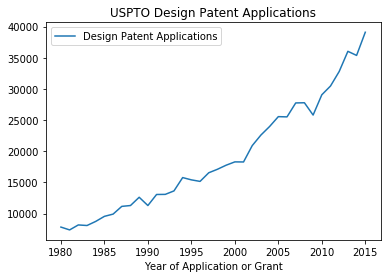

In [47]:
yearly_count.plot(x='Year of Application or Grant', y='Design Patent Applications',title='USPTO Design Patent Applications')

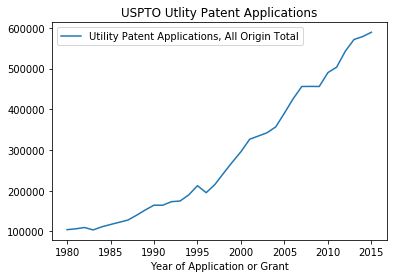

In [48]:
yearly_count.plot(x='Year of Application or Grant', y='Utility Patent Applications, All Origin Total',title='USPTO Utlity Patent Applications')

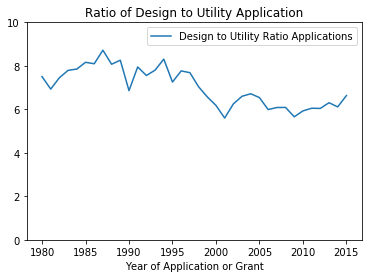

In [39]:
yearly_count.plot(x='Year of Application or Grant', y='Design to Utility Ratio Applications',title='Ratio of Design to Utility Application', ylim=[0,10])

Activity by grant year

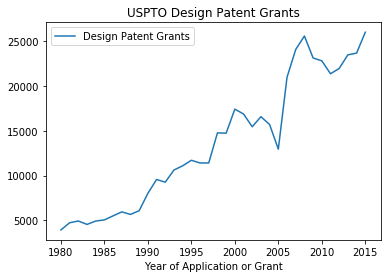

In [40]:
yearly_count.plot(x='Year of Application or Grant', y='Design Patent Grants',title='USPTO Design Patent Grants')

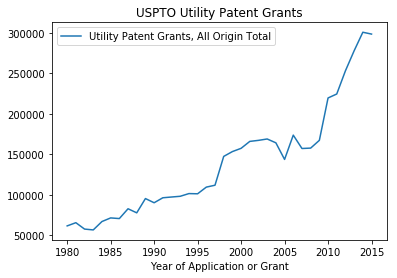

In [49]:
yearly_count.plot(x='Year of Application or Grant', y='Utility Patent Grants, All Origin Total',title='USPTO Utility Patent Grants')

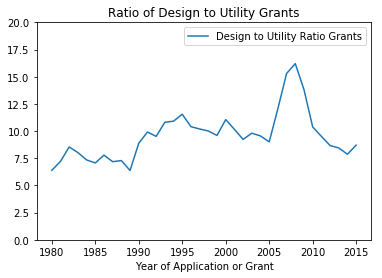

In [50]:
yearly_count.plot(x='Year of Application or Grant', y='Design to Utility Ratio Grants',title='Ratio of Design to Utility Grants', ylim=[0,20])

In [76]:
citations.shape

(6777656, 2)